In [1]:
import numpy as np
import pandas as pn
from math import floor,log

In [2]:
#getting the cost 
def l(X):
    dim = X.shape
    result = np.ones(dim)
    for i in range(dim[0]):
        for j in range(dim[1]):
            result[i][j] = log(X[i][j])
    return result


def cost(X,Y,theta):
    length = len(Y)
    sigmoidResult = sigmoid(np.matmul(X,theta))
    totalCost = -(1/length)*((np.matmul(Y.T,l(sigmoidResult)))  + np.matmul((1-Y).T,l(1-sigmoidResult)) )
    return np.sum(totalCost)

In [3]:
def addOne(z):
    dim = z.shape
    temp = np.ones([dim[0],dim[1] + 1])
    temp[...,1:] = z
    return temp

In [4]:
def convertColsToRows(arr):
    dim = arr.shape 
    return arr.reshape([dim[0],1])

In [5]:
def removeBlanks(z):
    temp = pn.DataFrame(z)
    return np.array(temp.dropna())    

In [6]:
def splitDataset(z):
    splittingLength = floor(z.shape[0] * .65)
    return [z[:splittingLength],z[splittingLength:]]


In [7]:
def returnXY(z):
    dim = z.shape
    Y = z[...,-1]
    X = z[...,:dim[1]-1]
    return [X,convertColsToRows(Y)]

In [8]:
def sigmoid(z):
    dim = z.shape
    result = np.ones(dim)
    for i in range(dim[0]):
        for j in range(dim[1]):
            result[i][j] = (1/(1 + np.exp(-z[i][j])))
    return result


In [9]:
def returnBinaryResult(z):
    dim = z.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            if z[i][j]>=0.5:
                z[i][j] = 1
            else:
                z[i][j] = 0
    return z

In [10]:
def gradientDescent(X,Y,theta,alpha,iterations):
    m = Y.shape[0]
    allCosts = []
    for i in range(iterations):
        theta = theta - (alpha/m) * ( np.matmul( X.T, sigmoid(np.matmul(X,theta)) - Y) ) 
        allCosts.append(cost(X,Y,theta))
    
    return [theta,allCosts]

In [11]:
def regGradientDescent(X,Y,theta,alpha,lam,iterations):
    m = Y.shape[0]
    temp = theta 
    temp[0] = 0
    for i in range(iterations):
        theta = theta - ((alpha/m) * ( np.matmul( X.T, sigmoid(np.matmul(X,theta)) - Y) ) + (lam/m)*temp)
    return theta

In [12]:
def scaleDown(X):
    means = []
    stds = []
    dim = X.shape
    result = np.ones(dim)
    for i in range(dim[1]):
        tempMean = np.mean(X[...,i])
        tempStd = np.std(X[...,i])
        tempResult =convertColsToRows((X[...,i] - tempMean)/tempStd)

        result[...,i] = tempResult[...,0]

        means.append(tempMean)
        stds.append(tempStd)
            
    return [result,np.array(means),np.array(stds)]


In [13]:
fullDataset = pn.read_csv('heartdisease.csv').values
fullDataset = removeBlanks(fullDataset)
#splitting the dataset into the parameters and the final result;
[X,Y] = returnXY(fullDataset)
#scaling down the values and extracting the means and stds of the columns;
[X,means,stds] = scaleDown(X)

#splitting the dataset into 70 : 30 ratio for training and testing;
[trainingDataset,testingDataset] = splitDataset(X)
#doing the same with the results;
[trainingResult,testingResult] = splitDataset(Y)

In [14]:
#Adding an extra column, this would act as the constant in the equation;
trainingDataset = addOne(trainingDataset)
testingDataset = addOne(testingDataset)

In [15]:
# print("Computing...")
iterations = 7000
alpha = 0.06
# [theta,allCosts] = gradientDescent(trainingDataset,trainingResult,np.ones([trainingDataset.shape[1],1]),alpha,iterations)



# after running 500 iterations
#this was done on my local machine
costArray = [1.998160757125593, 1.988815732001816, 1.9794895431883521, 1.9701823473028768, 1.960894299751846, 1.9516255590851732, 1.9423762842047008, 1.9331466353997027, 1.9239367741746347, 1.914746863198575, 1.9055770667012015, 1.8964275497632912, 1.8872984788067926,
 1.8781900210078615, 1.869102345070072, 1.8600356211770526, 1.8509900199631575, 1.8419657132127527, 1.8329628743454551, 1.823981677515432, 1.8150222976930057,
 1.8060849112193682, 1.7971696952451672, 1.7882768279702763, 1.7794064887227095, 1.7705588573919004, 1.7617341149816135, 1.7529324433647693, 1.7441540252914527, 1.73539904420245, 1.7266676843615638, 1.7179601310027317, 1.70927656982995, 1.700617187322378, 1.6919821706645453, 1.6833717076375645, 1.674785986656888, 1.6662251965000723, 1.6576895266886695, 
 1.6491791671455733, 1.6406943081793, 1.6322351406110807, 1.6238018555042681, 1.6153946442375295, 1.6070136984885741, 1.5986592102108703, 1.5903313714721234, 1.5820303745095707, 1.5737564115444527, 1.5655096750184057, 1.557290357160629,
  1.5490986502726483, 1.5409347464872334, 1.5327988378172535, 1.5246911159748462, 1.5166117725252022, 1.508560998565188, 1.5005389849556376, 1.4925459220051187, 1.484581999599378, 1.4766474070812026, 1.468742333165371, 1.460866965933596, 1.4530214927173835, 
  1.4452061000854337, 1.437420973798526, 1.4296662987021032, 1.4219422586655177, 1.4142490366214513, 1.406586814357218, 1.3989557725396253, 1.391356090695127, 1.3837879470288117, 1.3762515184673718, 1.3687469805836046, 1.3612745074779855, 1.3538342717704996, 1.346426444528798, 1.3390511952084154, 1.3317086915670031, 1.324399099669033, 1.3171225837403662, 1.3098793061607528, 1.3026694274206705, 1.2954931060142472,
   1.2883504983944554, 1.281241758959012, 1.274167039930649, 1.2671264913399858, 1.2601202609400435, 1.253148494192728, 1.2462113341753405, 1.2393089215328175, 1.232441394439288, 1.225608888520339, 1.2188115368462527, 1.212049469801607, 1.2053228151242257, 1.1986316977836307, 1.1919762399765024, 1.185356561051605, 1.1787727774796946, 1.1722250027860472, 1.1657133475350796, 1.1592379192427145, 1.1527988223864312, 1.1463961583041915, 1.1400300251983193, 1.1337005180746398,
    1.127407728694222, 1.121151745555717, 1.1149326538424522, 1.1087505353908993, 1.1026054686504458, 1.0964975286539937, 1.0904267869878412, 1.0843933117478985, 1.0783971675183404, 1.072438415338781, 1.0665171126771131, 1.0606333134004418, 1.0547870677538962, 1.0489784223295804, 1.0432074200501715, 1.037474100139584, 1.031778498106942, 1.026120645728423, 1.0205005710342152, 1.0149182982772487, 1.0093738479323586, 1.0038672366777766, 0.9983984773848913, 0.9929675791039726, 0.9875745470608204, 0.9822193826417762, 0.9769020833961575, 0.9716226430230421,
     0.9663810513723584, 0.9611772944450582, 0.95601135438682,
     0.9508832094922791, 0.9457928342077467, 0.9407401991308504, 0.9357252710192788, 0.9307480127971017, 0.9258083835579772, 0.9209063385772988, 0.9160418293215754, 0.911214803459545, 0.9064252048721462, 0.9016729736695314, 0.8969580462043494, 0.892280355085844, 0.8876398292008529, 0.8830363937261778, 0.8784699701542101, 0.8739404763065831, 0.8694478263615102, 0.8649919308715037, 0.8605726967893546, 0.8561900274914831, 0.8518438228045022, 0.8475339790298846, 0.8432603889737392, 0.8390229419739637, 0.8348215239301784, 0.8306560173340296, 0.8265263013017432,
      0.8224322516071152, 0.8183737407137791, 0.8143506378121893, 0.8103628088537711, 0.8064101165901509, 0.8024924206084897, 0.7986095773736552, 0.7947614402670937, 0.7909478596291766, 0.7871686828014326, 0.7834237541704014, 0.77971291521381, 0.7760360045441751, 0.7723928579591778, 0.7687833084882282, 0.765207186443117, 
     0.761664319467396, 0.7581545325904127,
      0.7546776482781653, 0.7512334864888092, 0.7478218647280263, 0.7444425981042236, 0.7410954993867142, 0.7377803790644424, 0.7344970454043931, 0.7312453045127532, 0.7280249603961356, 0.7248358150233403, 0.7216776683888819, 0.71855031857696, 0.7154535618257182, 0.7123871925926881, 0.7093510036212182, 0.7063447860073435, 0.7033683292660547, 0.7004214214003547, 0.6975038489689207, 0.69461539715469, 0.6917558498341426, 0.6889249896468813, 0.6861225980647048, 0.6833484554617447, 0.6806023411841546, 0.6778840336201226, 0.6751933102694788, 0.6725299478140304,
       0.6698937221868893, 0.6672844086420476, 0.6647017818237839, 0.6621456158348262, 0.6596156843060896, 0.6571117604638503, 0.6546336171974241, 0.6521810271266723, 0.6497537626677945, 0.6473515960995622, 0.6449742996281945, 0.642621645451553, 0.640293405822537, 0.6379893531118951, 0.6357092598695397, 0.6334528988856036,
       0.6312200432497237, 0.6290104664104175,
       0.62682394223165, 0.6246602450500728, 0.6225191497302085, 0.620400431718425, 0.6183038670957361, 0.6162292326300061,
       0.6141763058258456, 0.6121448649740051, 0.6101346891994179, 0.6081455585073279, 0.6061772538286931, 0.6042295570642215, 0.6023022511264977, 0.6003951199813108, 0.5985079486874717,
        0.5966405234348939, 0.5947926315818903, 0.5929640616906611, 0.5911546035614379, 0.5893640482654884, 0.5875921881763219, 0.5858388170001289, 0.5841037298043376, 0.5823867230450207, 0.5806875945929826, 0.5790061437585935, 0.5773421713150877, 0.5756954795208701, 0.5740658721402925, 
        0.5724531544633469, 0.5708571333241025, 0.5692776171177413, 0.5677144158167862, 0.5661673409857518, 0.5646362057949383, 0.5631208250329687, 0.5616210151182661, 0.5601365941095777, 0.5586673817152005, 0.5572131993014282, 0.5557738698998888, 0.5543492182140811, 0.5529390706246972, 0.5515432551942966, 0.5501616016710258, 0.5487939414914204, 0.5474401077824824, 0.5460999353629267, 0.54477326074367, 0.5434599221275084, 0.5421597594082777, 0.5408726141690843, 0.5395983296800447, 0.5383367508953973, 0.5370877244498768, 0.5358510986546461, 0.5346267234927174,
         0.5334144506135314, 0.5322141333275192, 0.5310256265997576, 0.5298487870433288, 0.5286834729123614, 0.5275295440944712, 0.5263868621029089, 0.5252552900682844, 0.5241346927300733, 0.5230249364275823, 0.5219258890907946, 0.5208374202308024, 0.5197594009300749, 0.5186917038323817, 0.5176342031324427, 0.5165867745655209,
         0.5155492953965881, 0.5145216444095446, 0.5135037018959729, 0.5124953496439991, 
       0.5114964709268495, 0.510506950491259, 0.5095266745458437, 0.5085555307493038, 0.5075934081984712, 0.5066401974163937, 0.5056957903402124, 0.5047600803090025, 0.5038329620515578, 0.5029143316741471, 0.5020040866481678, 0.5011021257977243, 0.5002083492873359, 0.49932265860937214, 0.49844495657170107, 0.4975751472851832, 0.4967131361511767, 0.4958588298490462, 0.495012136323744, 0.49417296477322675, 0.49334122563607535, 0.49251683057897755, 0.49169969248432344, 0.49088972543775955, 0.49008684471578395, 0.4892909667734373, 0.48850200923188325,
        0.48771989086615525, 0.48694453159287066, 0.4861758524579738, 0.4854137756245917, 0.48465822436081757, 0.4839091230276455, 0.48316639706690234, 0.4824299729891775, 0.4816997783619416, 0.480975741797537, 0.480257792941336, 0.479545862459945, 0.47883988202940425, 0.47813978432347004, 0.4774455030019979, 0.4767569726992639,
        0.47607412901247864, 0.4753969084902405, 0.4747252486211399, 0.47405908782234846, 0.4733983654283201, 0.4727430216794814, 0.4720929977110817, 0.47144823554200227, 0.47080867806368276, 0.4701742690291015, 0.4695449530417891, 0.4689206755449202, 0.4683013828104774, 0.46768702192846107, 0.4670775407961541, 0.46647288810747733, 0.4658730133423454, 0.46527786675617294, 0.4646873993693661, 0.46410156295691607, 0.4635203100380303, 0.4629435938658625, 0.46237136841726917, 0.4618035883826341, 0.46124020915579456, 0.4606811868239723, 0.4601264781578158, 
        0.4595760406014829, 0.45902983226280264, 0.4584878119034674, 0.45794993892934893, 0.45741617338082413, 0.4568864759231891, 0.456360807837149, 0.4558391310093484, 0.45532140792298714, 0.45480760164849326, 0.4542976758342803, 0.45379159469753444, 0.4532893230150968, 0.45279082611442756, 0.45229606986459914, 0.4518050206673651, 0.4513176454483375, 0.4508339116481844, 0.4503537872139204, 0.4498772405902567, 0.44940424071103874, 0.44893475699072133, 0.44846875931595165, 0.44800621803719415, 0.44754710396042824, 0.44709138833894324, 0.4466390428651827, 0.44619003966264864, 0.4457443512779212, 0.44530195067269446, 0.4448628112159384, 0.44442690667609114, 0.4439942112133593, 0.4435646993720787, 0.4431383460731226, 0.4427151266064368, 0.442295016623616, 
        0.441877992130552, 0.4414640294801799, 0.4410531053652844, 0.44064519681138675, 0.4402402811697023, 0.43983833611020207, 0.439439339614708, 0.4390432699701055, 0.43865010576161517, 0.4382598258661437, 0.4378724094457249,
         0.4374878359410295, 0.4371060850649566, 0.43672713679631037, 0.43635097137355233, 0.43597756928864084, 0.4356069112809456, 0.4352389783312422, 0.43487375165580244, 0.4345112127005476, 0.43415134313529985, 0.43379412484811564, 0.4334395399396908, 0.4330875707178562, 0.43273819969216515, 0.4323914095685583, 0.4320471832441025
        , 0.4317055038018369, 0.43136635450569005, 0.4310297187954764, 0.4306955802819999, 0.43036392274221685, 0.43003473011450827, 0.429707986494023, 0.4293836761281144, 0.4290617834118648, 0.42874229288368415, 0.42842518922101147,
         0.42811045723609914, 0.4277980818718715, 0.42748804819788827, 0.4271803414063779, 0.4268749468083771, 0.4265718498299346, 0.4262710360084256, 0.42597249098892703, 0.4256762005207021, 0.42538215045376165, 0.42509032673550473, 0.4248007154074572, 0.42451330260209397, 
        0.42422807453973965, 0.42394501752555375, 0.42366411794661896, 0.4233853622690827, 0.4231087370354166, 0.4228342288617311, 0.4225618244351922, 0.42229151051151015, 0.42202327391251215, 0.42175710152380597, 0.4214929802925092, 0.42123089722506535,
 0.4209708393851489, 0.42071279389163313, 0.4204567479166458, 0.4202026886836998, 0.4199506034659059, 0.4197004795842458, 0.419452304405941, 0.4192060653428789, 0.4189617498501211, 0.41871934542447636, 0.4184788396031594, 0.4182402199624974, 0.41800347411672695, 0.4177685897168438, 0.4175355544495328, 0.41730435603615196, 0.41707498223178535, 0.4168474208243648, 0.4166216596338413, 0.4163976865114365, 0.4161754893389345]


#this is the result that we would get after running the above function, as it takes some time to implement it,
#I have stored the values;

theta = np.array([[-1.97271514],
 [ 0.24237334],
 [ 0.50976825],
 [-0.05809133],
 [ 0.01644595],
 [ 0.26628155],
 [-0.00594616],
 [ 0.05382001],
 [ 0.08338464],
 [ 0.01453017],
 [ 0.08818715],
 [ 0.33290479],
 [-0.02619358],
 [ 0.07980733],
 [-0.07139145],
 [ 0.22360327]])

testResult = returnBinaryResult(sigmoid(np.matmul(testingDataset,theta)))

#Running the testCases;
length =testResult.shape[0]
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative =0
print("Running tests...")

for i in range(length):
    if (testResult[i] ==1 and  testingResult[i] == 1):
            truePositive+=1
    if (testResult[i] ==0 and  testingResult[i] == 0):
            trueNegative+=1
    if (testResult[i] ==1 and  testingResult[i] == 0):
            falsePositive+=1
    if (testResult[i] ==0 and  testingResult[i] == 1):
            falseNegative+=1

print(f"True positive : {truePositive} | True negative : {trueNegative} | False positive : {falsePositive} | False negative : {falseNegative} ")
    
precision = (truePositive)/(truePositive+falsePositive)
print(f"Precision : {precision*100}")
recall = (truePositive)/(truePositive+falseNegative)
print(f"Recall : {recall*100}")
specificity = (falsePositive)/(falsePositive + trueNegative)
print(f"Specificity : {specificity*100}")
f1 = (2*(recall*precision))/(recall+precision)
print(f"F1 score : {f1*100}")




Running tests...
True positive : 17 | True negative : 1077 | False positive : 6 | False negative : 180 
Precision : 73.91304347826086
Recall : 8.629441624365482
Specificity : 0.554016620498615
F1 score : 15.454545454545451


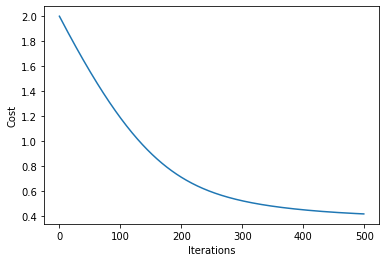

In [16]:
from matplotlib import pyplot as plot
plot.plot(np.arange(500),costArray)
plot.xlabel("Iterations")
plot.ylabel("Cost")
plot.show()